In [2]:
# import the necessary packages
import argparse
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
path = "fotos/cotxe1.jpg"

In [46]:
# load the image and convert it to grayscale
image = cv2.imread(path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# construct a rectangular kernel (13x5) and apply a blackhat
# operation which enables us to find dark regions on a light
# background

rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20,10))

blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)

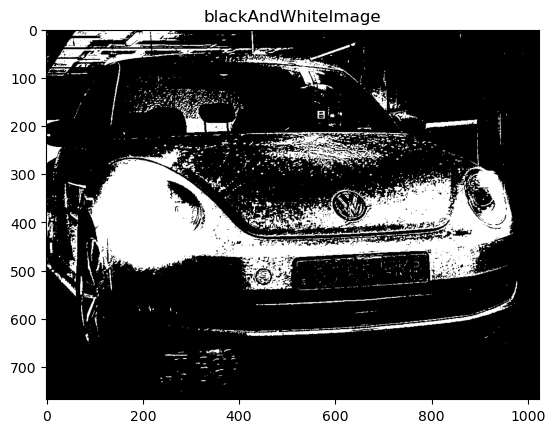

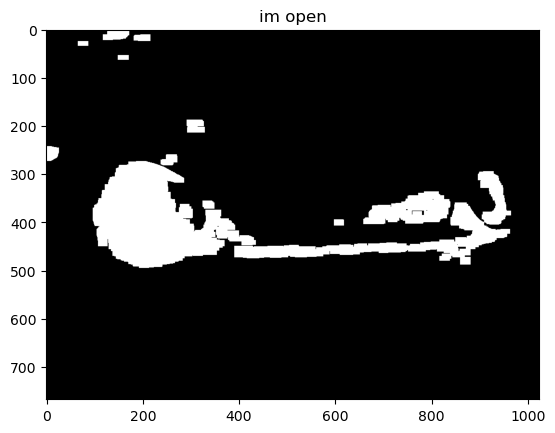

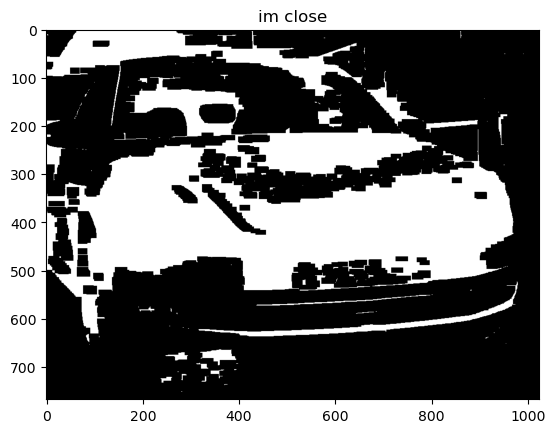

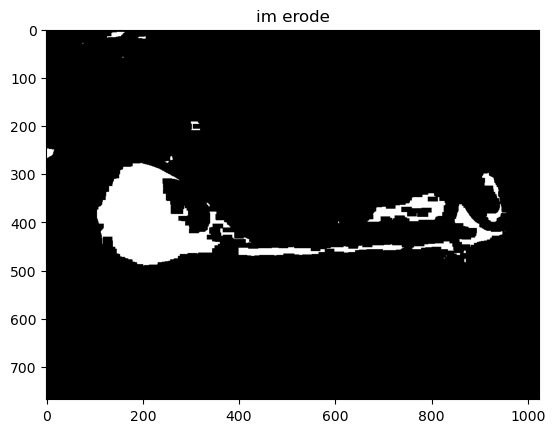

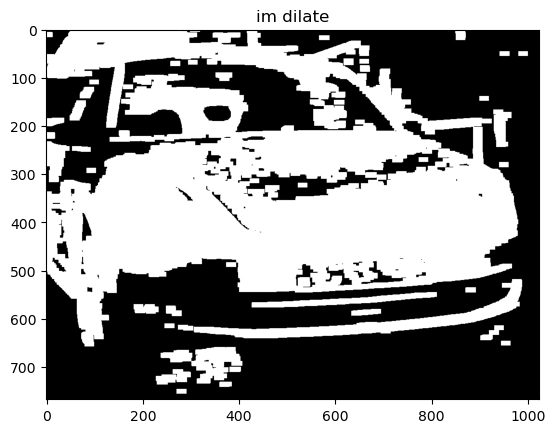

In [47]:
(thresh, blackAndWhiteImage) = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
black_open = cv2.morphologyEx(blackAndWhiteImage, cv2.MORPH_OPEN, rectKernel)
black_close = cv2.morphologyEx(blackAndWhiteImage, cv2.MORPH_CLOSE, rectKernel)
black_erode = cv2.erode(blackAndWhiteImage, rectKernel, iterations=1)
black_dilate = cv2.dilate(blackAndWhiteImage, rectKernel, iterations=1)
plt.title("blackAndWhiteImage")
plt.imshow(blackAndWhiteImage ,cmap='gray')
plt.show()
plt.title("im open")
plt.imshow(black_open,cmap='gray')
plt.show()
plt.title("im close")
plt.imshow(black_close,cmap='gray')
plt.show()
plt.title("im erode")
plt.imshow(black_erode,cmap='gray')
plt.show()
plt.title("im dilate")
plt.imshow(black_dilate,cmap='gray')
plt.show()

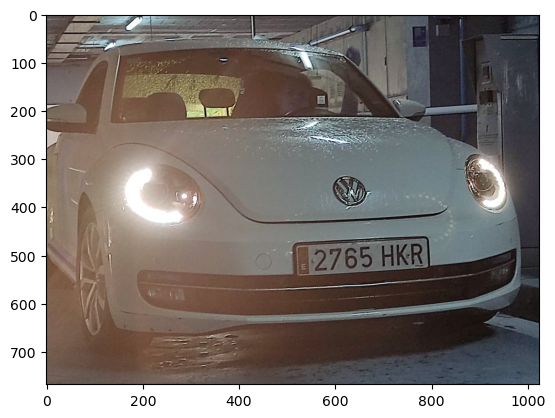

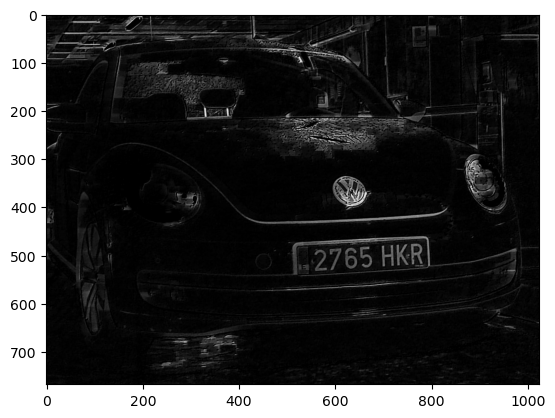

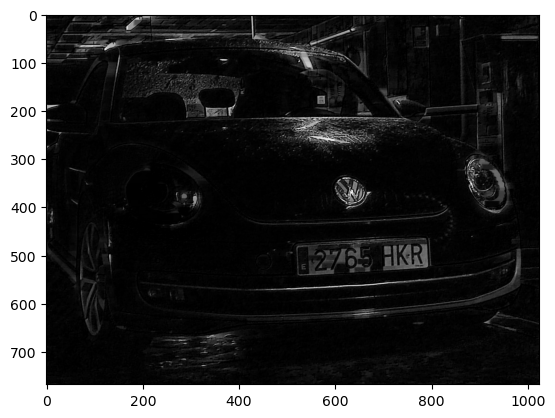

In [48]:
# similarly, a tophat (also called a "whitehat") operation will
# enable us to find light regions on a dark background
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)
# show the output images
plt.imshow(image, cmap="gray")
plt.show()
plt.imshow(blackhat, cmap="gray")
plt.show()
plt.imshow(tophat, cmap="gray")
plt.show()

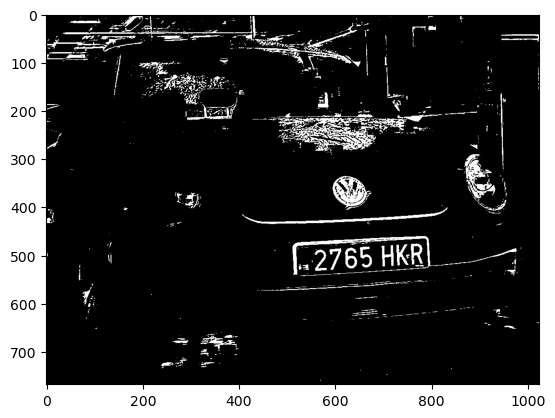

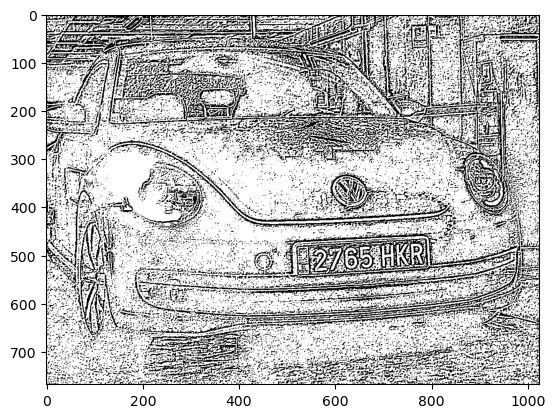

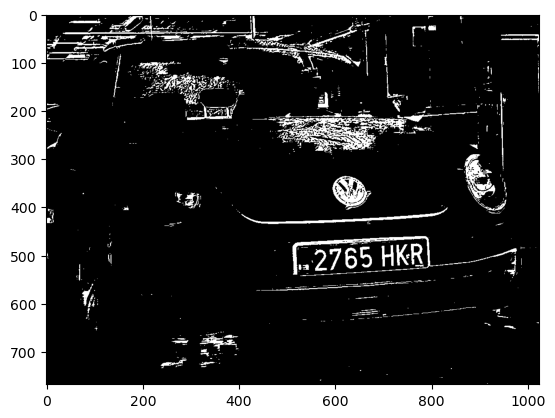

In [86]:
threshold, blackAndWhiteImage2 = cv2.threshold(blackhat, 50, 127, cv2.THRESH_BINARY)
blackAndWhiteImage3 = cv2.adaptiveThreshold(blackhat,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
ret3,th3 = cv2.threshold(blackhat,50,127,cv2.THRESH_OTSU)
plt.imshow(blackAndWhiteImage2, cmap="gray")
plt.show()
plt.imshow(blackAndWhiteImage3, cmap="gray")
plt.show()
plt.imshow(th3, cmap="gray")
plt.show()
